## Загрузка обученной модели

Сеть, которую мы будем дообучать мы возьмем из открытого источника: https://github.com/rcmalli/keras-vggface .

In [ ]:
! pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-vu3m__oo
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-vu3m__oo
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8295 sha256=5a2a3b4f2ddb2f9449d483916a3dfc5e1ec3c66a5c78c3f7134d760dc1a46118
  Stored in directory: /tmp/pip-ephem-wheel-cache-b3ta583e/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# # код из https://github.com/rcmalli/keras-vggface/blob/master/README.md
# # при выполнении вызовет ошибку -- это нормально

# from keras_vggface.vggface import VGGFace

# vggface = VGGFace(model='resnet50') # or VGGFace() as default

In [ ]:
! pip install gdown
import gdown  # to enable downloading of large files from google drive


url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:09<00:00, 17.5MB/s]


'resnet50face.h5'

In [ ]:
from tensorflow.keras.models import load_model
vggface_model = load_model("resnet50face.h5")

Модель загружена, а теперь посмотрим, что она из себя представляет. Это архитектура -- ResNet. На самом деле внутренности модели не очень важны для нас -- в дальнейшем мы заморозим бОльшую часть этой сети и будем рабоать только с последними слоями. Нам важно, что она обучена и мы имеем доступ к ее архитектуре и весам.

In [ ]:
vggface_model.summary() 

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['input_1[0][0]']             
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/

In [ ]:
'''VGGFace models for Keras.

# Notes:
- Utility functions are modified versions of Keras functions [Keras](https://keras.io)

'''



import numpy as np
from keras import backend as K
# from keras.utils.data_utils import get_file  # THIS NEEDS TO BE CORRECTED!!!
from keras.utils import get_file  # CORRECT version

V1_LABELS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_labels_v1.npy'
V2_LABELS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_labels_v2.npy'

VGG16_WEIGHTS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_vgg16.h5'
VGG16_WEIGHTS_PATH_NO_TOP = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_notop_vgg16.h5'


RESNET50_WEIGHTS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_resnet50.h5'
RESNET50_WEIGHTS_PATH_NO_TOP = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_notop_resnet50.h5'

SENET50_WEIGHTS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_senet50.h5'
SENET50_WEIGHTS_PATH_NO_TOP = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_notop_senet50.h5'


VGGFACE_DIR = 'models/vggface'


def preprocess_input(x, data_format=None, version=1):
    x_temp = np.copy(x)
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if version == 1:
        if data_format == 'channels_first':
            x_temp = x_temp[:, ::-1, ...]
            x_temp[:, 0, :, :] -= 93.5940
            x_temp[:, 1, :, :] -= 104.7624
            x_temp[:, 2, :, :] -= 129.1863
        else:
            x_temp = x_temp[..., ::-1]
            x_temp[..., 0] -= 93.5940
            x_temp[..., 1] -= 104.7624
            x_temp[..., 2] -= 129.1863

    elif version == 2:
        if data_format == 'channels_first':
            x_temp = x_temp[:, ::-1, ...]
            x_temp[:, 0, :, :] -= 91.4953
            x_temp[:, 1, :, :] -= 103.8827
            x_temp[:, 2, :, :] -= 131.0912
        else:
            x_temp = x_temp[..., ::-1]
            x_temp[..., 0] -= 91.4953
            x_temp[..., 1] -= 103.8827
            x_temp[..., 2] -= 131.0912
    else:
        raise NotImplementedError

    return x_temp


def decode_predictions(preds, top=5):
    LABELS = None
    if len(preds.shape) == 2:
        if preds.shape[1] == 2622:
            fpath = get_file('rcmalli_vggface_labels_v1.npy',
                             V1_LABELS_PATH,
                             cache_subdir=VGGFACE_DIR)
            LABELS = np.load(fpath)
        elif preds.shape[1] == 8631:
            fpath = get_file('rcmalli_vggface_labels_v2.npy',
                             V2_LABELS_PATH,
                             cache_subdir=VGGFACE_DIR)
            LABELS = np.load(fpath)
        else:
            raise ValueError('`decode_predictions` expects '
                             'a batch of predictions '
                             '(i.e. a 2D array of shape (samples, 2622)) for V1 or '
                             '(samples, 8631) for V2.'
                             'Found array with shape: ' + str(preds.shape))
    else:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 2622)) for V1 or '
                         '(samples, 8631) for V2.'
                         'Found array with shape: ' + str(preds.shape))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [[str(LABELS[i].encode('utf8')), pred[i]] for i in top_indices]
        result.sort(key=lambda x: x[1], reverse=True)
        results.append(result)
    return results


Для проверки того, что помимо архитектуры мы правильно загрузили веса, проверим предсказания модели на следующем изображении:

In [ ]:
! wget https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg -O brad_pitt.jpg

--2024-01-10 11:22:04--  https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.ua (img.joinfo.ua)... 104.21.83.52, 172.67.214.206, 2606:4700:3033::6815:5334, ...
Connecting to img.joinfo.ua (img.joinfo.ua)|104.21.83.52|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg [following]
--2024-01-10 11:22:05--  https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.com (img.joinfo.com)... 104.21.73.131, 172.67.162.235, 2606:4700:3030::ac43:a2eb, ...
Connecting to img.joinfo.com (img.joinfo.com)|104.21.73.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43154 (42K) [image/jpeg]
Saving to: ‘brad_pitt.jpg’

brad_pitt.jpg       100%[===================>]  42.14K  --.-KB/s    in 0s      

2024-01-10 11:22:06 (145 MB/s) - ‘brad_pitt.jpg’ saved [43154/43154]



После загрузки запустим полный пример из репозитория:

1346516/1346516 [==============================] - 0s 0us/step


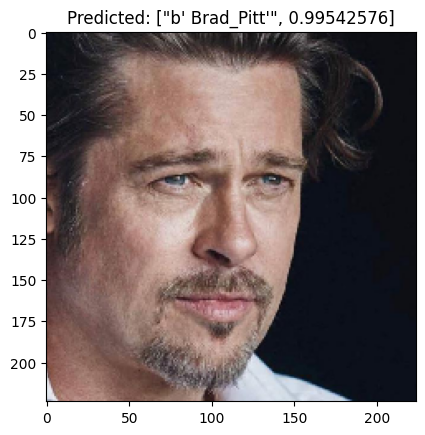

In [ ]:
# from keras_vggface import utils  # Causes error brcause of Keras structural changes. No need here
from tensorflow.keras.preprocessing import image

img = image.load_img("brad_pitt.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# We do not import utils here, but use the functionы defined above
# x = utils.preprocess_input(x, version=2) # мы используем resnet50 -- поэтому version2. Эта функция нам еще пригодится!
x = preprocess_input(x, version=2) # мы используем resnet50 -- поэтому version2. Эта функция нам еще пригодится!
preds = vggface_model.predict(x) # модель -- известная нам keras model, вызываем predict
# plt.title(f"Predicted: {utils.decode_predictions(preds)[0][0]}") # используем  decode_predictions из keras_vggface
plt.title(f"Predicted: {decode_predictions(preds)[0][0]}")
plt.imshow(img)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
from pathlib import Path
from collections import Counter

In [ ]:
# url = 'https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk'
# output = '/tmp/UTKFace.tar.gz'
# gdown.download(url, output, quiet=False)
# ! tar -xzf /tmp/UTKFace.tar.gz -C /tmp/
# url = 'https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2'
# output = 'train_val_split_utk.csv'
# gdown.download(url, output, quiet=False)

In [ ]:
# NB! Access is denied for the URL above. Use dataset from Kaggle

url = 'https://drive.google.com/file/d/1vUwpeg-ErRFXtrtzi2Qja9OhGcDCQ3Cy/view?usp=sharing'  # full dataset on my Google Disk
output = '/tmp/UTKFace.zip'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)
# ! tar -xzf /tmp/UTKFace.tar.gz -C /tmp/
! unzip '/tmp/UTKFace.zip' -d '/tmp/'  # The dataset is zipped not tared!

url = 'https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2'
output = 'train_val_split_utk.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1vUwpeg-ErRFXtrtzi2Qja9OhGcDCQ3Cy
To: /tmp/UTKFace.zip
100%|██████████| 121M/121M [00:03<00:00, 34.9MB/s]


'/tmp/UTKFace.zip'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /tmp/UTKFace/53_0_1_20170116191725055.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_3_20170104220848558.jpg.chip.jpg  
  inflating: /tmp/UTKFace/53_0_3_20170109132854337.jpg.chip.jpg  
  inflat

Downloading...
From: https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2
To: /content/train_val_split_utk.csv
100%|██████████| 1.08M/1.08M [00:00<00:00, 105MB/s]


'train_val_split_utk.csv'

In [ ]:
data_folder = Path("/tmp/UTKFace/")
filenames = list(map(lambda x: x.name, data_folder.glob('*.jpg')))
print(len(filenames))
print(filenames[:3]) # имя файла содержит возраст, индекс пола и расы, перечисленные через нижнее подчеркивание

23708
['26_0_0_20170117173443951.jpg.chip.jpg', '21_0_0_20170117142115098.jpg.chip.jpg', '1_0_0_20170103210905939.jpg.chip.jpg']


In [ ]:
# формируем датафрейм с путями и нужными классами
np.random.seed(10)
np.random.shuffle(filenames)
gender_mapping = {0: 'Male', 1: 'Female'}
race_mapping = dict(list(enumerate(('White', 'Black', 'Asian', 'Indian', 'Others'))))
age_labels, gender_labels, race_labels, correct_filenames = [], [], [], []

for filename in filenames:
    if len(filename.split('_')) != 4:
        print(f"Bad filename {filename}")
        continue

    age, gender, race, _ = filename.split('_')
    correct_filenames.append(filename)
    age_labels.append(age)
    gender_labels.append(gender)
    race_labels.append(race)

age_labels = np.array(age_labels, dtype=np.float32)
max_age = age_labels.max()
data = {"img_name": correct_filenames,
        "age": age_labels / max_age, # нормализуем возраст от 0 до 1
        "race": race_labels,
        "gender": gender_labels}
df = pd.DataFrame(data)
df.head()

Bad filename 61_1_20170109150557335.jpg.chip.jpg
Bad filename 61_1_20170109142408075.jpg.chip.jpg
Bad filename 39_1_20170116174525125.jpg.chip.jpg


img_name       age race gender
0  77_1_0_20170113002117891.jpg.chip.jpg  0.663793    0      1
1  70_0_0_20170120222043358.jpg.chip.jpg  0.603448    0      0
2  50_0_0_20170104021859988.jpg.chip.jpg  0.431034    0      0
3  40_0_0_20170104183456150.jpg.chip.jpg  0.344828    0      0
4  52_0_3_20170113184200775.jpg.chip.jpg  0.448276    3      0

In [ ]:
df_split = pd.read_csv("train_val_split_utk.csv", index_col=0).set_index("img_name")
df_split.head()
df = df.set_index("img_name").join(df_split).reset_index()
df_train = df[df["is_train"] == 1]
df_val = df[df["is_train"] != 1]
print(len(df_val), len(df_train))

is_train
img_name                                       
29_0_0_20170117180855986.jpg.chip.jpg         1
29_0_4_20170117202712541.jpg.chip.jpg         1
35_0_1_20170117104607288.jpg.chip.jpg         1
17_0_0_20170110231830374.jpg.chip.jpg         1
23_0_0_20170117194023317.jpg.chip.jpg         1

4759 18946


In [ ]:
def decode_labels(race_id, gender_id, age):
    return race_mapping[int(race_id)], gender_mapping[int(gender_id)], int(age*max_age)
def show_face(image, race_id, gender_id, age):
    plt.imshow(image)
    race, gender, age = decode_labels(race_id, gender_id, age)
    plt.title(f"Gender: {gender}, Race: {race}, Age: {age}")

Убедимся, что метки классов корректны:

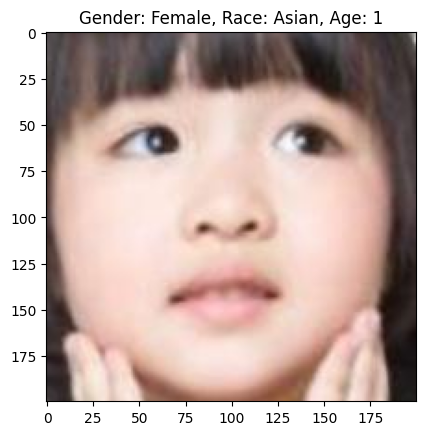

In [ ]:
row = df.iloc[np.random.randint(len(df))]
img = plt.imread(str(data_folder / row["img_name"]))
show_face(img, row["race"], row["gender"], row["age"])

Посмотрим на их распределение:

Counter({'White': 10078, 'Black': 4526, 'Indian': 3975, 'Asian': 3434, 'Others': 1692})
Counter({'Male': 12391, 'Female': 11314})


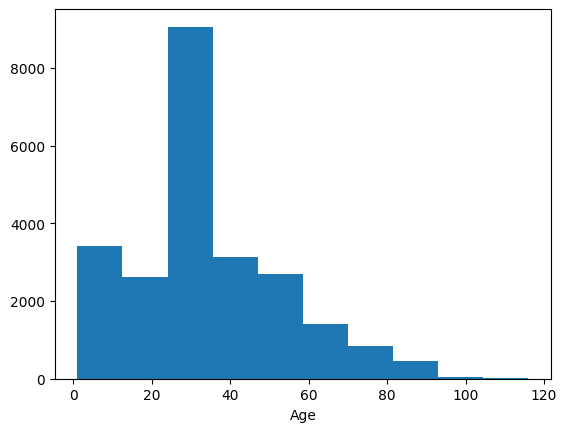

In [ ]:
races_verbose = [race_mapping[int(race)] for race in df["race"]]
genders_verbose = [gender_mapping[int(gender)] for gender in df["gender"]]
from collections import Counter
print(Counter(races_verbose))
print(Counter(genders_verbose))
_ = plt.hist(df["age"]*max_age)
_ = plt.xlabel("Age")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input_facenet(image_):
    """
    image_ -- тензор размера (1, H, W, 3)

    return: картинка, с примененным preprocess_input(..., version=2) из keras_vggface (см пример с Бредом Питом)

    """


    preprocessed = preprocess_input(image_, version=2)
    return preprocessed

image_gen = ImageDataGenerator(preprocessing_function=preprocess_input_facenet)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 128
IMAGE_SIZE = 224

train_generator = image_gen.flow_from_dataframe(
    df_train,
    directory=str(data_folder),
    x_col='img_name',
    y_col='gender',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True)


val_generator = image_gen.flow_from_dataframe(
    df_val,
    directory=str(data_folder),
    x_col='img_name',
    y_col='gender',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False)




Found 18946 validated image filenames belonging to 2 classes.
Found 4759 validated image filenames belonging to 2 classes.


In [ ]:
sample_images, sample_labels = next(val_generator)
assert sample_images.shape == (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3), "Неправильный размер батча"
assert sample_labels.shape == (BATCH_SIZE,), "Неправильный размер меток класса"
assert list(sorted(np.unique(sample_labels))) == [0., 1.], "Ожидаемые классы 0 и 1"
print("Simple tests passed")

Simple tests passed


Попробуем отобразить картинку и ее лейбл для проверки генерации:

Male


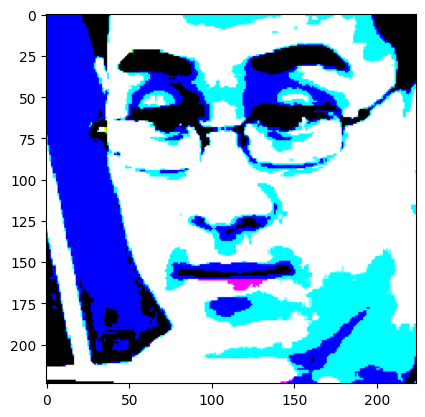

In [ ]:
plt.imshow(sample_images[100])
print(gender_mapping[int(sample_labels[100])])
# matplotlib ожидает картинку с интесивностями от 0 до 1 если она типа float и от 0 до 255 если int.

In [ ]:
print(sample_images[100].max(), sample_images[100].min()) # можно увидеть что значения яркостей типа float и в т.ч. отрицательные

154.5047 -130.0912


Female


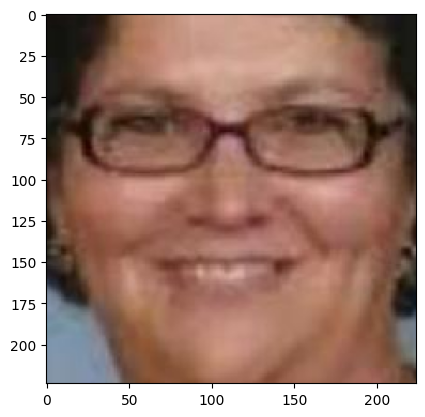

In [ ]:
def deprocess_image(vggface_image):
    """
    vggface_image -- (H, W, 3) картинка после препросессинга.
    содержит отрицательные значения и некорректно отображается matplotlib

    return: корректно отображаеая картинка типа np.uint8(!!).

    ! работайте с копией картинки (image = np.copy(vggface_image)) !
    """

    image = np.copy(vggface_image)
    image[..., 0] += 91.4953
    image[..., 1] += 103.8827
    image[..., 2] += 131.0912
    image = image[..., ::-1].astype(np.uint8)

    return image

# теперь картинка должна отображаться корректно
plt.imshow(deprocess_image(sample_images[5]))
print(gender_mapping[int(sample_labels[5])])

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.summary()

In [ ]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

In [ ]:
print("Количество слоев в базовой модели: ", len(base_model.layers))

Количество слоев в базовой модели:  175


>*Определим последовательную модель на основе частично "замороженной" базовой*

In [ ]:
# base_model.trainable = False # freeze the entire base model

# freeze the first 150 layers of 175
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

# base_model.summary() # to check for 0 trainable parameters


In [ ]:
# Define the model
model_gender = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dense(1, activation='sigmoid')  # We have binary class male/female
])
model_gender.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23561152  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23563201 (89.89 MB)
Trainable params: 8931329 (34.07 MB)
Non-trainable params: 14631872 (55.82 MB)
_________________________________________________________________


In [ ]:
# Compile the model (binary, accuracy)
model_gender.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


In [ ]:
# Attach my Google Disk
from google.colab import drive
drive.mount('/content/drive/')

# Define the path for checkpoin saving
path = Path("/content/drive/My Drive/SkillBox/DataScience/DS Neuro Nets/5 Convolution Neuro Nets for picture classification part 2/model_gender")
path.mkdir(exist_ok=True, parents=True) # Create the directory according to the path"
assert path.exists()

# Configuring checkpoint saving
cpt_filename = "checkpoint_best.h5"  # file name
cpt_path =str(path / cpt_filename)  # full path
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


Mounted at /content/drive/


In [ ]:
# Обучение модели предсказания пола

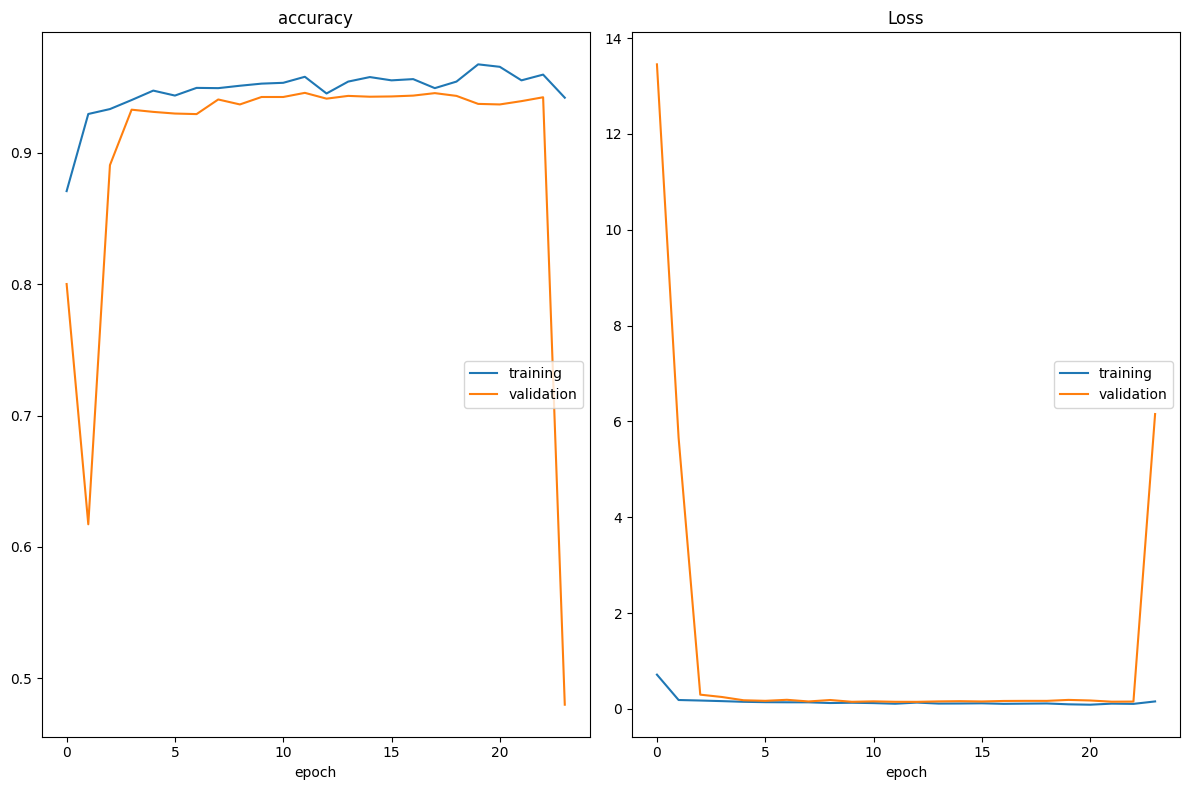

accuracy
	training         	 (min:    0.871, max:    0.967, cur:    0.942)
	validation       	 (min:    0.480, max:    0.946, cur:    0.480)
Loss
	training         	 (min:    0.086, max:    0.714, cur:    0.155)
	validation       	 (min:    0.146, max:   13.451, cur:    6.153)

Epoch 24: val_accuracy did not improve from 0.94579
25/25 [==============================] - 28s 1s/step - loss: 0.1547 - accuracy: 0.9421 - val_loss: 6.1526 - val_accuracy: 0.4797


In [ ]:
EPOCHS = 24
# `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
history = model_gender.fit(
    x=train_generator,
    epochs=EPOCHS,
    steps_per_epoch=25,
    validation_data=val_generator,
    callbacks=[PlotLossesCallback(), checkpoint]  # list of callbacks: both graphs and checkpoints in this instance
    )


In [ ]:
# model_gender = load_model("model_gender/checkpoint_best.h5")
model_gender = load_model(cpt_path)
loss, acc = model_gender.evaluate(val_generator)
if acc < 0.9:
    print("Please, try harder!")
else:
    if acc >= 0.94:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

38/38 [==============================] - 17s 426ms/step - loss: 0.1472 - accuracy: 0.9458
Well done!


In [ ]:
#@title (вспомогательный код, выполните клетку)
def show_faces(images, real_race=None, real_gender=None, real_age=None,
               predicted_race=None, predicted_gender=None, predicted_age=None):
    plt.figure(figsize=(10,10))
    labels = {"Gender": [predicted_gender, real_gender],
                  "Race": [predicted_race, real_race],
                  "Age": [predicted_age, real_age]}
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(deprocess_image(images[i]))
        real_str = "Real:"
        pred_str = "Pred:"
        correct = True
        for name, (predicted, real) in labels.items():
            if predicted is None:
                continue
            if name == "Age":
                real_age = int(real[i]*int(max_age))
                predicted_age = int(predicted[i]*max_age)
                real_str += f"{real_age}"
                pred_str += f"{predicted_age}"
                if np.abs(predicted_age - real_age) > 6:
                    correct = False

            elif name == "Gender":
                real_gender = int(real[i])
                predicted_gender = int(predicted[i] > 0.5)
                real_str += f"{gender_mapping[real_gender]}, "
                pred_str += f"{gender_mapping[predicted_gender]}, "
                if real_gender != predicted_gender:
                    correct = False
            elif name == "Race":
                real_race = int(real[i])
                predicted_race = np.argmax(predicted[i])
                real_str += f"{race_mapping[real_race]}, "
                pred_str += f"{race_mapping[predicted_race]}, "
                if real_race != predicted_race:
                    correct = False

        title_obj = plt.title(f"{real_str}\n{pred_str}")

        plt.subplots_adjust(wspace=0.4)
        if not correct:
            plt.setp(title_obj, color='r')


4/4 [==============================] - 3s 59ms/step


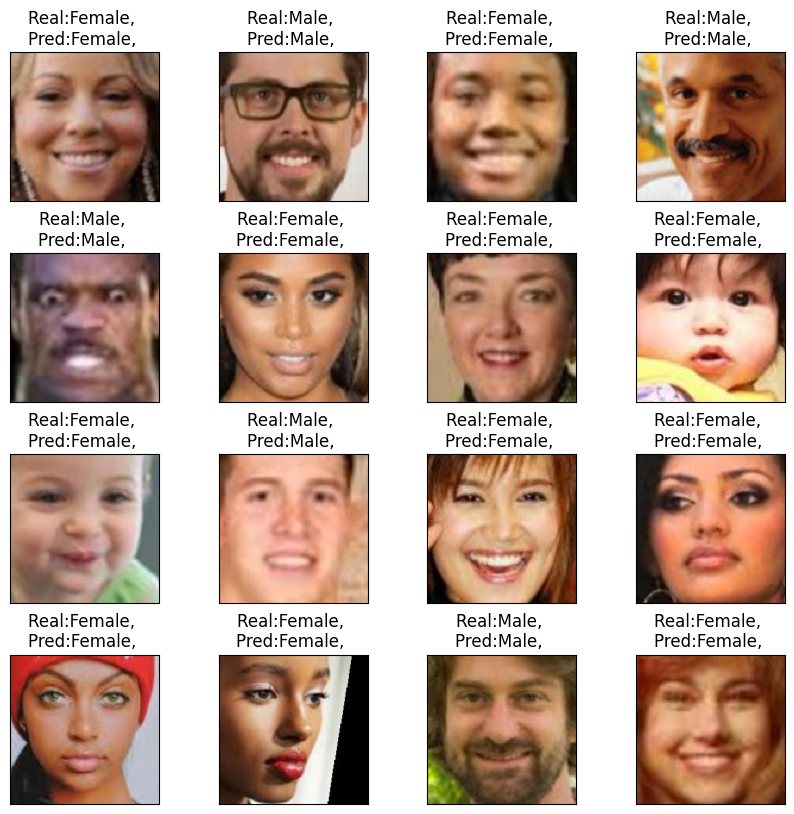

In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_gender.predict(sample_validation_images)
show_faces(sample_validation_images, real_gender=sample_validation_labels, predicted_gender=predicted)

In [ ]:
vggface_model = load_model("resnet50face.h5")
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

>*Создадим генераторы для модели презсказания расы*

In [ ]:
BATCH_SIZE = 128
IMAGE_SIZE = 224

train_generator_race = image_gen.flow_from_dataframe(
    df_train,
    directory=str(data_folder),
    x_col='img_name',
    y_col='race',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse',
    batch_size=BATCH_SIZE,
    shuffle=True)


val_generator_race = image_gen.flow_from_dataframe(
    df_val,
    directory=str(data_folder),
    x_col='img_name',
    y_col='race',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse',
    batch_size=BATCH_SIZE,
    shuffle=False)


Found 18946 validated image filenames belonging to 5 classes.
Found 4759 validated image filenames belonging to 5 classes.


>*Определим последовательную модель на основе частично "замороженной" базовой*

In [ ]:
base_model.trainable = True # unfreeze the entire base model

# freeze the first 125 layers of 175
fine_tune_at = 125
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

base_model.summary() # to check for trainable parameters


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['input_1[0][0]']             
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/bn[0][0]'

In [ ]:
# Define the model
model_race = tf.keras.Sequential([
  base_model,
  # tf.keras.layers.Dense(1024, activation='sigmoid',
  #                       kernel_regularizer=tf.keras.regularizers.L2(0.0075),
  #                       bias_regularizer=tf.keras.regularizers.L2(0.0075)),  # hidden layer with regularization
  tf.keras.layers.Dense(5, activation='softmax')  # 5 classes output
])

# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Define loss func.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Define metrics
metrics=['accuracy']

# Compile the model
model_race.compile(optimizer=optimizer,
                   loss=loss,
                   metrics=metrics)


In [ ]:
model_race.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 2048)              23561152  
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23571397 (89.92 MB)
Trainable params: 16356869 (62.40 MB)
Non-trainable params: 7214528 (27.52 MB)
_________________________________________________________________


In [ ]:
# Define the path for checkpoint saving
path = Path("/content/drive/My Drive/SkillBox/DataScience/DS Neuro Nets/5 Convolution Neuro Nets for picture classification part 2/model_race")
path.mkdir(exist_ok=True, parents=True) # Create the directory according to the path"
assert path.exists()

# Configuring checkpoint saving
cpt_filename = "checkpoint_best.h5"  # file name
cpt_path =str(path / cpt_filename)  # full path
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
# Обучение модели предсказания расы

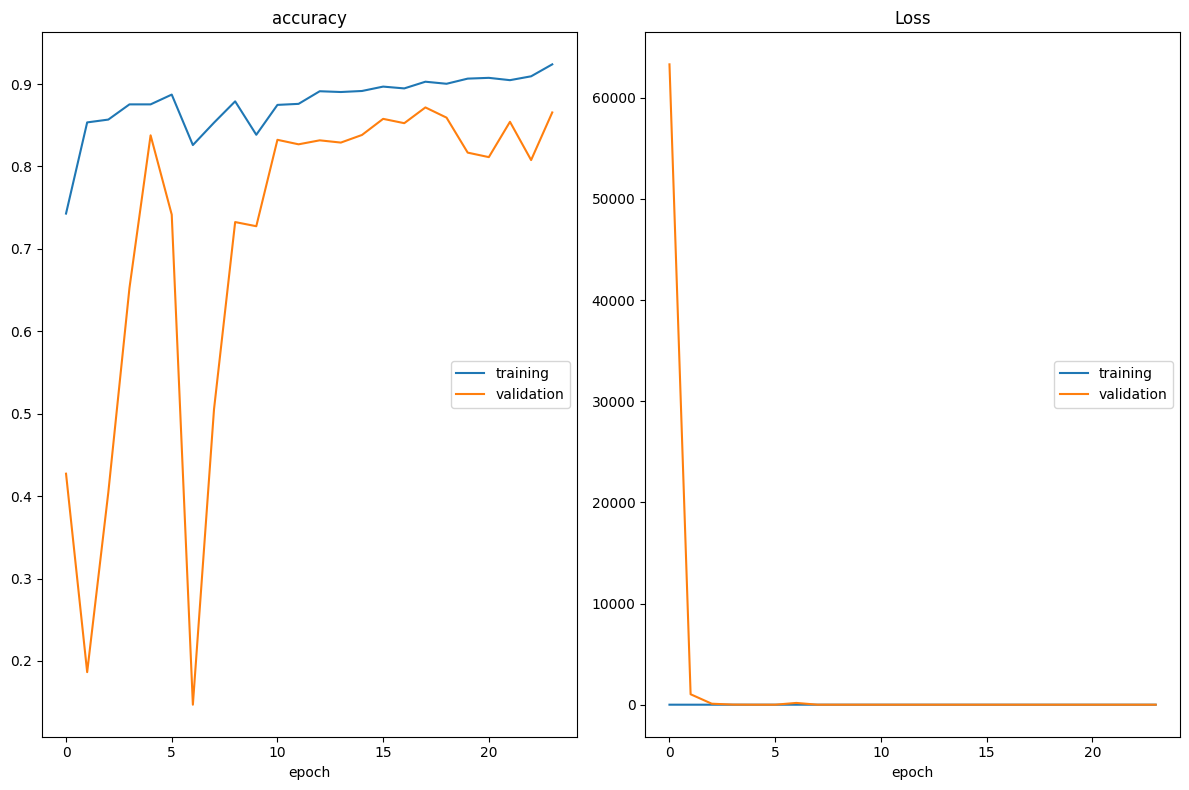

accuracy
	training         	 (min:    0.743, max:    0.924, cur:    0.924)
	validation       	 (min:    0.147, max:    0.872, cur:    0.866)
Loss
	training         	 (min:    0.238, max:    1.386, cur:    0.238)
	validation       	 (min:    0.412, max: 63295.133, cur:    0.472)

Epoch 24: val_accuracy did not improve from 0.87161
25/25 [==============================] - 29s 1s/step - loss: 0.2376 - accuracy: 0.9239 - val_loss: 0.4716 - val_accuracy: 0.8655


In [ ]:
EPOCHS = 24
# `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
history = model_race.fit(
    x=train_generator_race,
    epochs=EPOCHS,
    steps_per_epoch=25,
    validation_data=val_generator_race,
    callbacks=[PlotLossesCallback(), checkpoint]  # list of callbacks: both graphs and checkpoints in this instance
    )

In [ ]:
# model_race = load_model("model_race/checkpoint_best.h5")
model_race = load_model(cpt_path)
loss, acc = model_race.evaluate(val_generator_race)
if acc < 0.8:
    print("Please, try harder!")
else:
    if acc >= 0.85:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

38/38 [==============================] - 17s 420ms/step - loss: 0.4123 - accuracy: 0.8716
Well done!


4/4 [==============================] - 1s 104ms/step


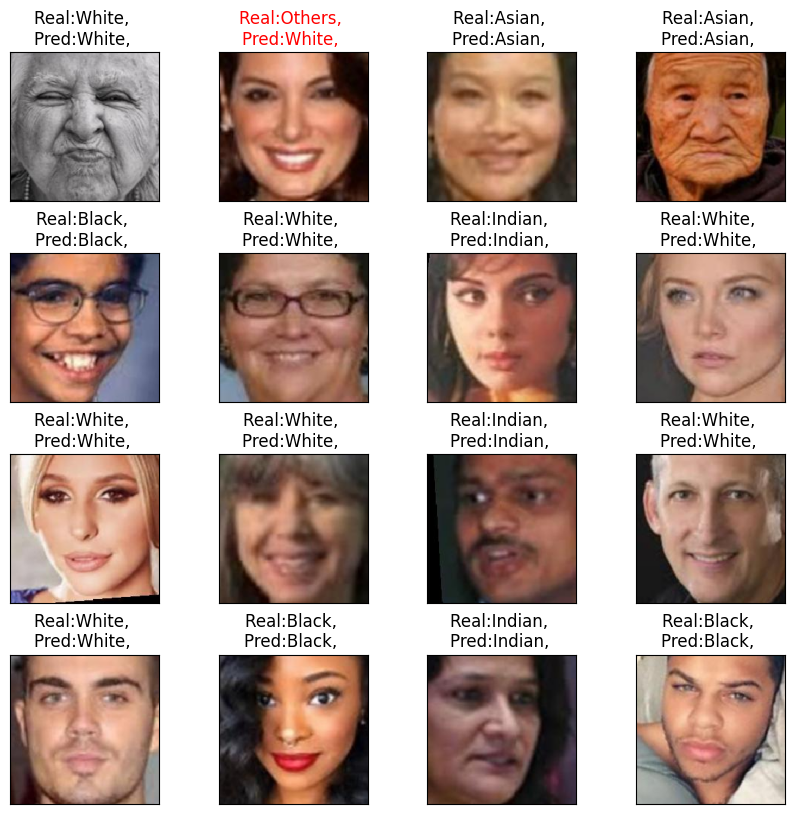

In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator_race)
predicted = model_race.predict(sample_validation_images)
show_faces(sample_validation_images, real_race=sample_validation_labels, predicted_race=predicted)


In [ ]:
vggface_model = load_model("resnet50face.h5")
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

Ниже мы приводим необходимые генераторы данных. Обратите внимание на y_col и class_mode.


In [ ]:
train_generator = image_gen.flow_from_dataframe(
        dataframe=df_train,
        class_mode="other",
        x_col="img_name", y_col=["gender", "race", "age"], # нас интересуют все три столбца
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="other",
        x_col="img_name", y_col=["gender", "race", "age"],
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
def split_outputs(generator):
    """
    Вспомогательная функция, которая модернизирует генераторы картинок, чтобы их
    можно было использовать для Мultitask
    image_gen.flow_from_dataframe возвращает на каждой итерации батч:
    ((N, H, W, 3), (N, 3)) -- N картинок и N троек меток (для трех "задач")
    model.fit(..) ожидает генератор в формате:
    ((N, H, W, 3), [(N, 1), (N, 1), (N, 1)])

    Для такого превращения и нужна эта функция.

    """
    while True:
        data = next(generator)
        image = data[0]
        # The following 'labels =' is amended by suggestion in Telegram DataScience group
        # labels = np.split(data[1], 3, axis=1)
        labels = np.split(data[1].astype("float32"), 3, axis=1)
        # The following labels = is added by suggestion in Telegram DataScience group
        labels = [labels[0].reshape((len(labels[0]),)),
                  labels[1].reshape((len(labels[1]),)),
                  labels[2].reshape((len(labels[2]),))]
        yield image, labels


Found 18946 validated image filenames.
Found 4759 validated image filenames.


А теперь перейдем к обучению:

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # вы можете выбрать другую скорость обучения для вашей модели

# обратите внимание, что теперь loss -- это словарь, в котором к каждому выходу мы "прицепляем" свой лосс
# аналогично с metrics
model.compile(optimizer=optimizer,
              loss={'gender': 'binary_crossentropy', 'race': 'sparse_categorical_crossentropy', 'age': 'mse'},
              metrics={'gender': 'accuracy', 'race': 'accuracy', 'age': 'mae'})

# path = Path("model_multitask")
path = Path("/content/drive/My Drive/SkillBox/DataScience/DS Neuro Nets/5 Convolution Neuro Nets for picture classification part 2/model_multitask")
path.mkdir(exist_ok=True)
cpt_filename = "checkpoint_best.h5"
cpt_path =str(path / cpt_filename)

# checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_age_mean_absolute_error', verbose=1, save_best_only=True, mode='min') - wrong!
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_age_mae', verbose=1, save_best_only=True, mode='min')


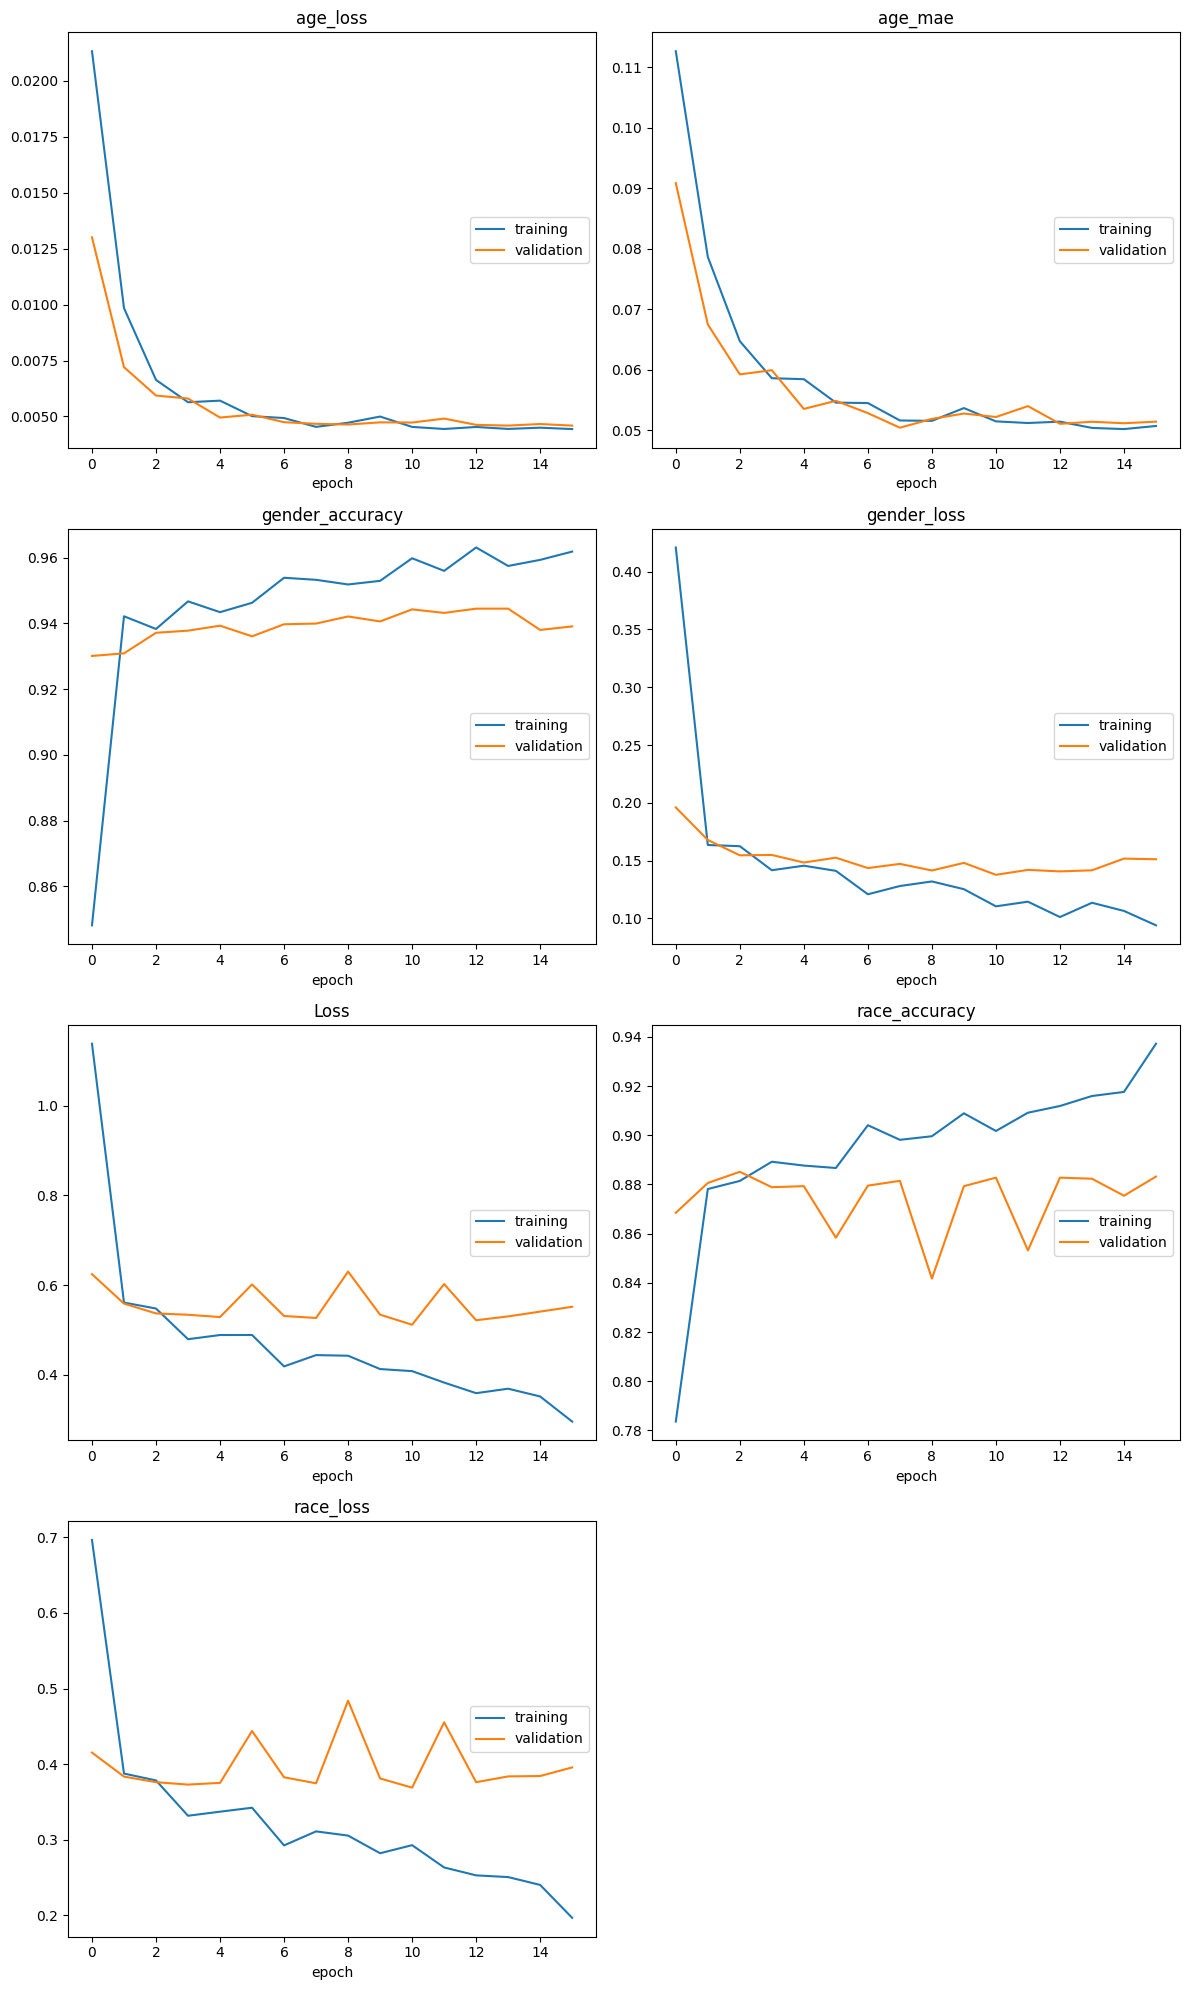

age_loss
	training         	 (min:    0.004, max:    0.021, cur:    0.004)
	validation       	 (min:    0.005, max:    0.013, cur:    0.005)
age_mae
	training         	 (min:    0.050, max:    0.113, cur:    0.051)
	validation       	 (min:    0.050, max:    0.091, cur:    0.051)
gender_accuracy
	training         	 (min:    0.848, max:    0.963, cur:    0.962)
	validation       	 (min:    0.930, max:    0.945, cur:    0.939)
gender_loss
	training         	 (min:    0.094, max:    0.421, cur:    0.094)
	validation       	 (min:    0.138, max:    0.196, cur:    0.151)
Loss
	training         	 (min:    0.295, max:    1.139, cur:    0.295)
	validation       	 (min:    0.511, max:    0.630, cur:    0.552)
race_accuracy
	training         	 (min:    0.784, max:    0.937, cur:    0.937)
	validation       	 (min:    0.842, max:    0.885, cur:    0.883)
race_loss
	training         	 (min:    0.197, max:    0.697, cur:    0.197)
	validation       	 (min:    0.369, max:    0.484, cur:    0.396)

E

In [ ]:
EPOCHS = 16
# model.fit_generator(split_outputs(train_generator), epochs=15, validation_data=split_outputs(val_generator),- deprecated
history = model.fit(
    split_outputs(train_generator), epochs=EPOCHS, validation_data=split_outputs(val_generator),
    callbacks=[PlotLossesCallback(), checkpoint], steps_per_epoch=50,
    validation_steps= len(df_val) // BATCH_SIZE)


In [ ]:
# model_multitask = load_model("model_multitask/checkpoint_best.h5")
model_multitask = load_model(cpt_path)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="other",
        x_col="img_name", y_col=["gender", "race", "age"],
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
results = model.evaluate(split_outputs(val_generator), steps=len(df_val)//BATCH_SIZE)
assert results[-3] > 0.90, f"Gender accuracy is too low. Please try to improve it {results[-3]}"
assert results[-2] > 0.80, f"Race accuracy is too low. Please try to improve it. {results[-2]}"
assert results[-1] < 0.09, f"Age MAE it too high: {results[-1]}"
print("Well done!")

Found 4759 validated image filenames.
37/37 [==============================] - 16s 434ms/step - loss: 0.5488 - gender_loss: 0.1509 - race_loss: 0.3933 - age_loss: 0.0046 - gender_accuracy: 0.9388 - race_accuracy: 0.8830 - age_mae: 0.0513
Well done!


4/4 [==============================] - 1s 91ms/step


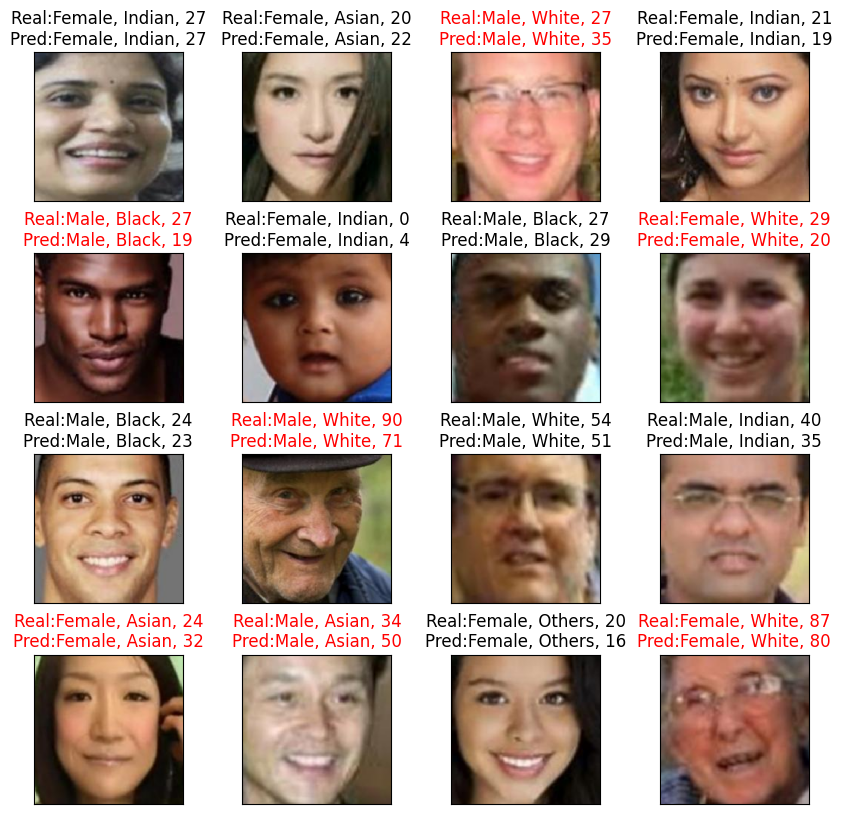

In [ ]:
sample_validation_images, sample_validation_labels = next(split_outputs(val_generator))
predicted = model_multitask.predict(sample_validation_images)
show_faces(sample_validation_images,
           real_gender=sample_validation_labels[0], predicted_gender=predicted[0],
           real_race=sample_validation_labels[1], predicted_race=predicted[1],
           real_age=sample_validation_labels[2].flatten(), predicted_age=predicted[2].flatten(),
           )

**Попробуем улучшить результат**

In [ ]:
vggface_model = load_model("resnet50face.h5")
base_model_test = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model_test.trainable = False

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 model_8 (Functional)        (None, 2048)                 2356115   ['input_4[0][0]']             
                                                          2                                       
                                                                                                  
 add_layer1 (Dense)          (None, 254)                  520446    ['model_8[0][0]']             
                                                                                                  
 add_gender (Dense)          (None, 128)                  32640     ['add_layer1[0][0]']    

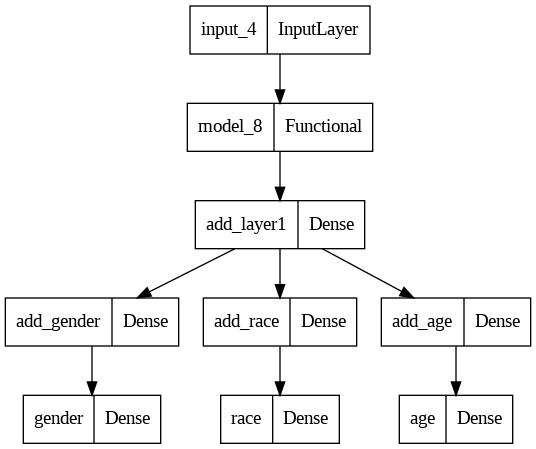

In [ ]:
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Input
# from tensorflow.keras.utils import plot_model


input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# < YOUR CODE STARTS HERE >
# переменная model должна содержать модель для дальнейшего обучения

base_model_test.trainable = True
# freeze the first 125 layers of 175

fine_tune_at = 125
for layer in base_model_test.layers[:fine_tune_at]:
    layer.trainable =  False

l1_output = base_model_test(input_layer)  # base model frozen as a single layer
l2_output = Dense(254, name="add_layer1", activation='sigmoid')(l1_output)

gender_add_output = Dense(128, name='add_gender', activation='sigmoid')(l2_output)
gender_output = Dense(1, name="gender", activation='sigmoid',
                      kernel_regularizer=tf.keras.regularizers.L2(0.25),
                      bias_regularizer=tf.keras.regularizers.L2(0.25))(gender_add_output)  # gender output

race_add_output = Dense(128, name='add_race', activation='sigmoid')(l2_output)
race_output = Dense(5, name='race', activation='softmax',
                    kernel_regularizer=tf.keras.regularizers.L2(0.25),
                    bias_regularizer=tf.keras.regularizers.L2(0.25))(race_add_output)  # race output

age_add_output = Dense(254, name='add_age', activation='sigmoid')(l2_output)
age_output = Dense(1, name="age", activation='sigmoid',
                   kernel_regularizer=tf.keras.regularizers.L2(0.75),
                   bias_regularizer=tf.keras.regularizers.L2(0.75))(age_add_output)  # age output


# build up the model
model_test = tf.keras.Model(inputs=input_layer, outputs=[gender_output, race_output, age_output])

# < YOUR CODE ENDS HERE >
model_test.summary()
plot_model(model_test)


In [ ]:
prediction = model_test(np.zeros((6, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32))
assert len(prediction) == 3, "Модель должна возвращать три тензора"
assert prediction[0].shape == (6, 1), f"Неправильный размер выхода gender: {prediction[0].shape}"
assert prediction[1].shape == (6, 5), f"Неправильный размер выхода race: {prediction[1].shape}"
assert prediction[2].shape == (6, 1), f"Неправильный размер выхода age: {prediction[2].shape}"
print("Shape tests passed")

Shape tests passed


Ниже мы приводим необходимые генераторы данных. Обратите внимание на y_col и class_mode.


In [ ]:
# train_generator = image_gen.flow_from_dataframe(
#         dataframe=df_train,
#         class_mode="other",
#         x_col="img_name", y_col=["gender", "race", "age"], # нас интересуют все три столбца
#         directory=str(data_folder),
#         target_size=(IMAGE_SIZE, IMAGE_SIZE),
#         batch_size=BATCH_SIZE,
#         shuffle=True)
# val_generator = image_gen.flow_from_dataframe(
#         dataframe=df_val,
#         class_mode="other",
#         x_col="img_name", y_col=["gender", "race", "age"],
#         directory=str(data_folder),
#         target_size=(IMAGE_SIZE, IMAGE_SIZE),
#         batch_size=BATCH_SIZE,
#         shuffle=True)
# def split_outputs(generator):
#     """
#     Вспомогательная функция, которая модернизирует генераторы картинок, чтобы их
#     можно было использовать для Мultitask
#     image_gen.flow_from_dataframe возвращает на каждой итерации батч:
#     ((N, H, W, 3), (N, 3)) -- N картинок и N троек меток (для трех "задач")
#     model.fit(..) ожидает генератор в формате:
#     ((N, H, W, 3), [(N, 1), (N, 1), (N, 1)])

#     Для такого превращения и нужна эта функция.

#     """
#     while True:
#         data = next(generator)
#         image = data[0]
#         # The following 'labels =' is amended by suggestion in Telegram DataScience group
#         # labels = np.split(data[1], 3, axis=1)
#         labels = np.split(data[1].astype("float32"), 3, axis=1)
#         # The following labels = is added by suggestion in Telegram DataScience group
#         labels = [labels[0].reshape((len(labels[0]),)),
#                   labels[1].reshape((len(labels[1]),)),
#                   labels[2].reshape((len(labels[2]),))]
#         yield image, labels


А теперь перейдем к обучению:

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=25e-4) # вы можете выбрать другую скорость обучения для вашей модели

# обратите внимание, что теперь loss -- это словарь, в котором к каждому выходу мы "прицепляем" свой лосс
# аналогично с metrics
model_test.compile(optimizer=optimizer,
              loss={'gender': 'binary_crossentropy', 'race': 'sparse_categorical_crossentropy', 'age': 'mse'},
              metrics={'gender': 'accuracy', 'race': 'accuracy', 'age': 'mae'})

# path = Path("model_multitask")
path = Path("/content/drive/My Drive/SkillBox/DataScience/DS Neuro Nets/5 Convolution Neuro Nets for picture classification part 2/model_multitask_test")
path.mkdir(exist_ok=True)
cpt_filename = "checkpoint_best.h5"
cpt_path =str(path / cpt_filename)

# checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_age_mean_absolute_error', verbose=1, save_best_only=True, mode='min') - wrong!
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_age_mae', verbose=1, save_best_only=True, mode='min')


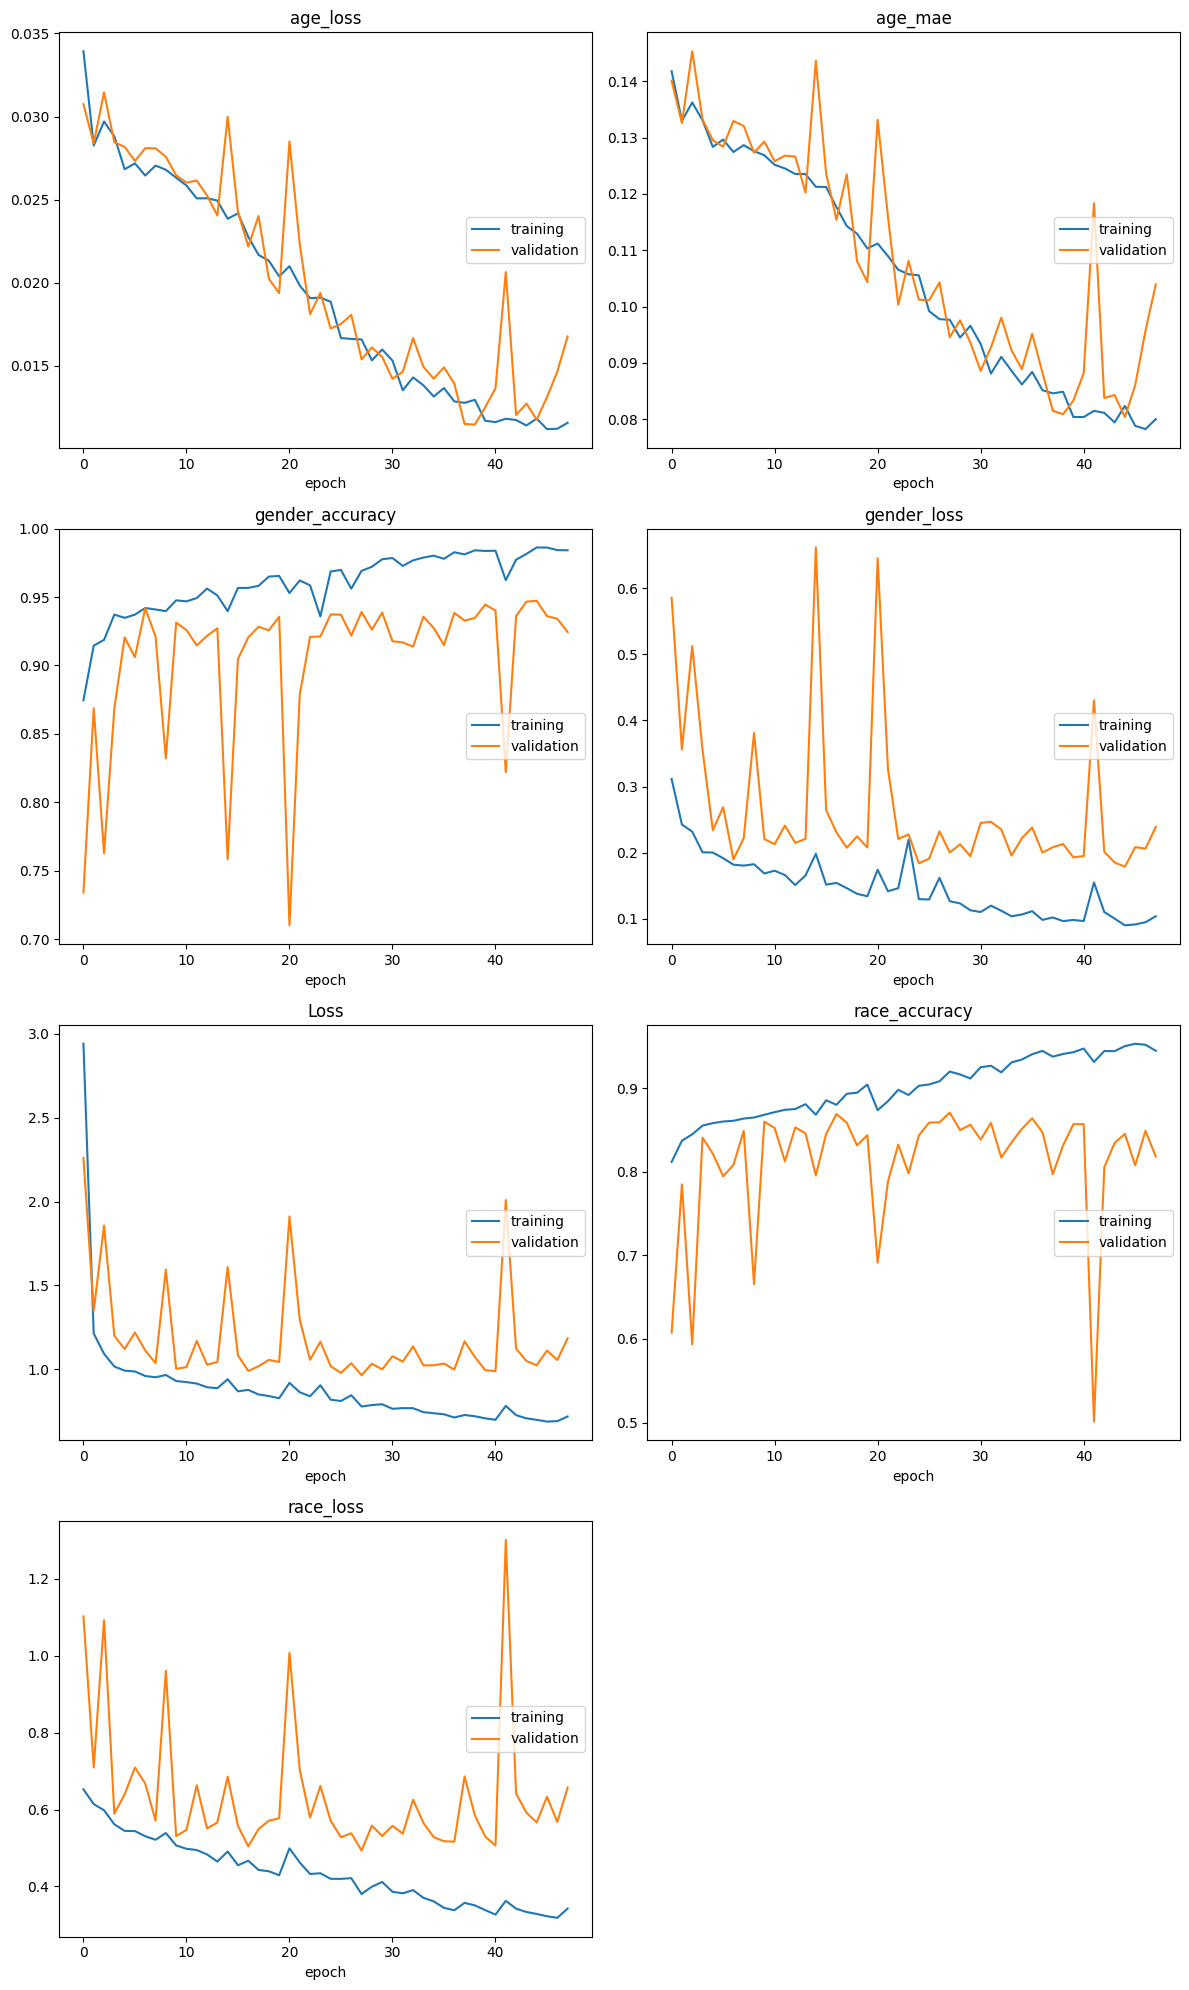

age_loss
	training         	 (min:    0.011, max:    0.034, cur:    0.012)
	validation       	 (min:    0.011, max:    0.031, cur:    0.017)
age_mae
	training         	 (min:    0.078, max:    0.142, cur:    0.080)
	validation       	 (min:    0.080, max:    0.145, cur:    0.104)
gender_accuracy
	training         	 (min:    0.875, max:    0.986, cur:    0.984)
	validation       	 (min:    0.710, max:    0.947, cur:    0.924)
gender_loss
	training         	 (min:    0.090, max:    0.311, cur:    0.104)
	validation       	 (min:    0.179, max:    0.661, cur:    0.239)
Loss
	training         	 (min:    0.688, max:    2.941, cur:    0.718)
	validation       	 (min:    0.964, max:    2.260, cur:    1.184)
race_accuracy
	training         	 (min:    0.812, max:    0.953, cur:    0.945)
	validation       	 (min:    0.501, max:    0.871, cur:    0.818)
race_loss
	training         	 (min:    0.318, max:    0.652, cur:    0.342)
	validation       	 (min:    0.493, max:    1.301, cur:    0.657)

E

In [ ]:
EPOCHS = 48
# model.fit_generator(split_outputs(train_generator), epochs=15, validation_data=split_outputs(val_generator),- deprecated
history = model_test.fit(
    split_outputs(train_generator), epochs=EPOCHS, validation_data=split_outputs(val_generator),
    callbacks=[PlotLossesCallback(), checkpoint], steps_per_epoch=50,
    validation_steps= len(df_val) // BATCH_SIZE)


In [ ]:
# model_multitask = load_model("model_multitask/checkpoint_best.h5")
model_multitask = load_model(cpt_path)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="other",
        x_col="img_name", y_col=["gender", "race", "age"],
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
results = model_multitask.evaluate(split_outputs(val_generator), steps=len(df_val)//BATCH_SIZE)
assert results[-3] > 0.90, f"Gender accuracy is too low. Please try to improve it {results[-3]}"
assert results[-2] > 0.80, f"Race accuracy is too low. Please try to improve it. {results[-2]}"
assert results[-1] < 0.09, f"Age MAE it too high: {results[-1]}"
print("Well done!")

Found 4759 validated image filenames.
37/37 [==============================] - 18s 448ms/step - loss: 1.0401 - gender_loss: 0.1838 - race_loss: 0.5780 - age_loss: 0.0120 - gender_accuracy: 0.9447 - race_accuracy: 0.8425 - age_mae: 0.0814
Well done!


4/4 [==============================] - 2s 101ms/step


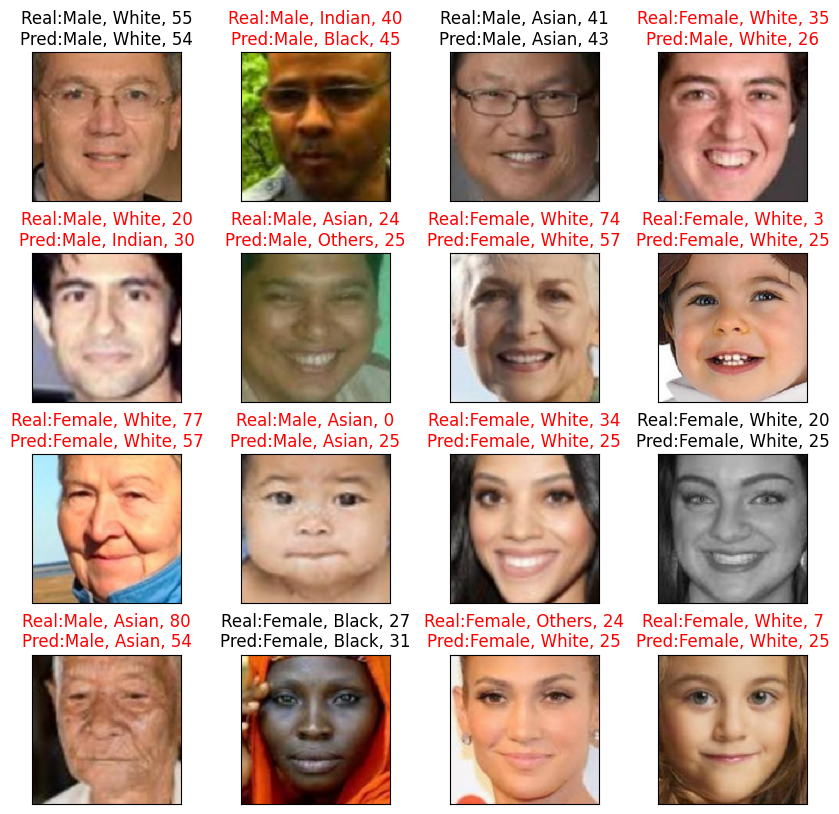

In [ ]:
sample_validation_images, sample_validation_labels = next(split_outputs(val_generator))
predicted = model_multitask.predict(sample_validation_images)
show_faces(sample_validation_images,
           real_gender=sample_validation_labels[0], predicted_gender=predicted[0],
           real_race=sample_validation_labels[1], predicted_race=predicted[1],
           real_age=sample_validation_labels[2].flatten(), predicted_age=predicted[2].flatten(),
           )

###b)
Загрузите любое лицо и получите предсказание. Не забудьте его обрезать соответствующим образом. Результат сети не оценивается.

Downloading...
From: https://drive.google.com/uc?id=1mcNa3o8-8tt6VALpkIZ8ZPWHzw32XJYg
To: /content/me.jpg
100%|██████████| 1.21M/1.21M [00:00<00:00, 79.8MB/s]


'me.jpg'

1/1 [==============================] - 0s 39ms/step


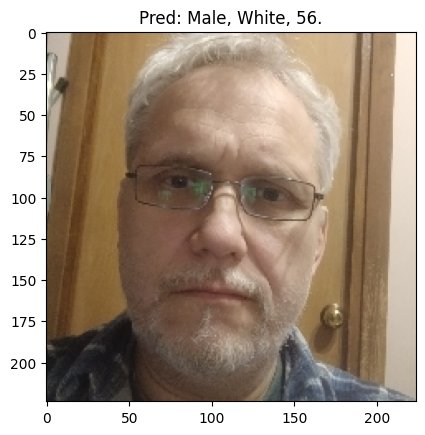

In [ ]:
# url = 'https://drive.google.com/uc?id=1ZZgwwVxSjWG6gJT2uV2vt54QsLJcU07-'
url = 'https://drive.google.com/file/d/1mcNa3o8-8tt6VALpkIZ8ZPWHzw32XJYg/view?usp=drive_link'
output = 'me.jpg'
gdown.download(url, output=output, quiet=False, fuzzy=True)

img = image.load_img("me.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = utils.preprocess_input(x, version=2)  # we've defined preprocess_input within this notebook
x = preprocess_input(x, version=2)
predicted_labels = model_test.predict(x)
plt.imshow(img)
gender, race, age = int(predicted_labels[0][0] > 0.5), np.argmax(predicted_labels[1][0]), predicted_labels[2][0]
title_obj = f"Pred: {gender_mapping[gender]}, {race_mapping[race]}, {int(age[0]*max_age)}."
_ = plt.title(title_obj)
# :-)
